![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part III

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 19/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0002Part003.ipynb)

In [ ]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp

# Machine Learning

# Computer Vision

# Statistics
from scipy.stats import multivariate_normal as MVN

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [ ]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [ ]:
# Constants

DATA_FILE_URL   = r''
DATA_FILE_NAME  = r''

TOTAL_RUN_TIME = 10 #<! Don't touch it!


## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [ ]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 10 [Sec]


## Team Members

 - `<FULL>_<NAME>_<ID001>`.
 - `<FULL>_<NAME>_<ID002>`.

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

In [ ]:
# Students Packages to Import
# If you need a package not listed above, use this cell



## Generate / Load Data

In [ ]:
# Generate / Load Data

N1    = 250
N2    = 150
N3    = 200

vMu1  = np.array([0, 0  ])
vMu2  = np.array([2, 0.5])
vMu3  = np.array([4, 1  ])

mSig1 = 0.5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mSig2 = 0.5 * np.array([[ 1.00, -1.25],
                       [-1.25,  2.00]])

mSig3 = 0.5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mX1 = MVN.rvs(mean = vMu1, cov = mSig1, size = N1)
mX2 = MVN.rvs(mean = vMu2, cov = mSig2, size = N2)
mX3 = MVN.rvs(mean = vMu3, cov = mSig3, size = N3)
mX  = np.r_[mX1, mX2, mX3]


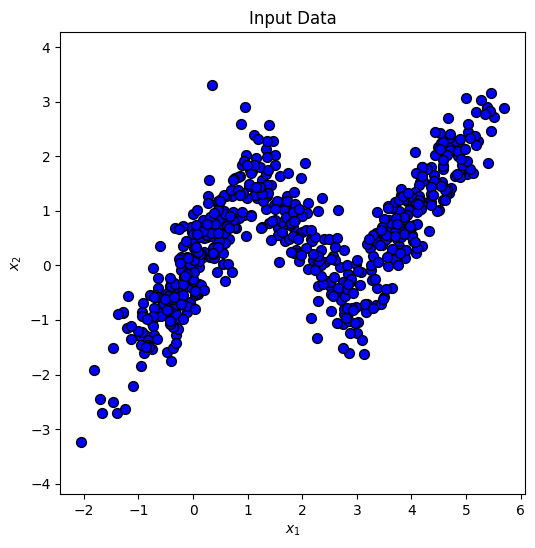

In [ ]:
# Plot Data
hF, hA = plt.subplots(figsize = (6, 6))

hA.scatter(mX[:, 0], mX[:, 1], s = 50, edgecolors = 'k', color = 'b')
hA.axis('equal')
hA.set_title('Input Data')
hA.set_xlabel('${x}_{1}$')
hA.set_ylabel('${x}_{2}$')

plt.show()

## 7. Clustering by Gaussian Mixture Model (GMM)

### 7.1. GMM Algorithm

The GMM algorithm aims to maximize the (log) likelihood objective:
$$\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}f=\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}\sum_{i=1}^{N}\log\left(\sum_{k=1}^{K}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right)$$

In this section you should implement:

1. `InitGmm()` - Given a data set and number of clusters it sets the initialization of the `GMM` algorithm:  
   - `mμ` - Should be initialized by the [`K-Means++`](https://en.wikipedia.org/wiki/K-means%2B%2B) algorithm.
   - `tΣ` - Should be initialized by diagonal matrices with the data variance on the diagonal (A scalar matrix).
   - `vW` - Should be initialized with a uniform distribution.  
2. `CalcGmmObj()` - Given a data set and set of parameters it calculate the value of the GMM objective function.
3. `GMM()` - Given a data set and initialization applies the GMM algorithm.  
The stopping criteria should be number of iterations or minimal improvement in the objective function.

* <font color='brown'>(**#**)</font> Implementation should be efficient (Memory and operations). Total run time expected to be **less than 60 seconds**.
* <font color='brown'>(**#**)</font> You may use the `scipy.stats.multivariate_normal` class.



In [ ]:
#===========================Fill This===========================#
def InitGmm(mX: np.ndarray, K: int, seedNum: int = 123) -> np.ndarray:
    '''
    GMM algorithm initialization.
    Args:
        mX          - Input data with shape N x d.
        K           - Number of clusters.
        seedNum     - Seed number used.
    Output:
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
    Remarks:
        - Given the same parameters, including the `seedNum` the algorithm must be reproducible.
        - mμ Should be initialized by the K-Means++ algorithm.
    '''

    mu = [mX[np.random.randint(mX.shape[0])]]

    for _ in range(1, K):
        distances = sp.spatial.distance.cdist(mX, np.array(mu))
        min_dist = np.min(distances, axis=1)
        min_dist_sum = np.sum(min_dist)
        probabilities = min_dist / min_dist_sum
        new_centroid_idx = np.random.choice(mX.shape[0], p=probabilities)
        mu.append(mX[new_centroid_idx])

    d = mX.shape[1]
    t_sigma = np.zeros((d, d, K))
    for k in range(K):
        variance = np.var(mX, axis=0)
        t_sigma[:, :, k] = np.diag(variance)

    vW = np.ones(K) / K
    return np.array(mu), t_sigma, vW

#===============================================================#

In [ ]:
#===========================Fill This===========================#
def CalcGmmObj(mX: np.ndarray, mμ: np.ndarray, tΣ: np.ndarray, vW: np.ndarray) -> float:
    '''
    GMM algorithm objective function.
    Args:
        mX          - The data with shape N x d.
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
    Output:
        objVal      - The value of the objective function of the GMM.
    Remarks:
        - A
    '''

    N, d = mX.shape
    K = mμ.shape[0]

    obj_val = 0.0

    for i in range(N):
      l = 0
      for k in range(K):
        cov_matrix = tΣ[:, :, k]
        mvn = MVN(mean=mμ[k], cov=cov_matrix)
        l += vW[k] * mvn.pdf(mX[i])
      obj_val+=np.log(l)
    return obj_val
#===============================================================#

In [ ]:
#===========================Fill This===========================#
def GMM(mX: np.ndarray, mμ: np.ndarray, tΣ: np.ndarray, vW: np.ndarray, numIter: int = 1000, stopThr: float = 1e-5) -> np.ndarray:
    '''
    GMM algorithm.
    Args:
        mX          - Input data with shape N x d.
        mμ          - The initial mean vectors with shape K x d.
        tΣ          - The initial covariance matrices with shape (d x d x K).
        vW          - The initial weights of the GMM with shape K.
        numIter     - Number of iterations.
        stopThr     - Stopping threshold.
    Output:
        mμ          - The final mean vectors with shape K x d.
        tΣ          - The final covariance matrices with shape (d x d x K).
        vW          - The final weights of the GMM with shape K.
        vL          - The labels (0, 1, .., K - 1) per sample with shape (N, )
        lO          - The objective function value per iterations (List).
    Remarks:
        - The maximum number of iterations must be `numIter`.
        - If the objective value of the algorithm doesn't improve by at least `stopThr` the iterations should stop.
    '''

    N, d = mX.shape
    K = mμ.shape[0]

    lO = []

    for iter in range(numIter):
      r = np.zeros((N, K))
      for k in range(K):
        cov_matrix = tΣ[:,:,k]
        mvn = MVN(mean=mμ[k], cov=cov_matrix)
        r[:,k] = vW[k]*mvn.pdf(mX)

      r = r/ np.sum(r, axis=1, keepdims=True)

      nK = np.sum(r,axis=0)
      vW = nK/N

      for j in range(K):
        mμ[j] = np.sum(r[:, j:j+1] * mX, axis=0) / nK[j]
        diff = mX - mμ[j]
        tΣ[:, :, j] = (np.dot((diff * r[:, j:j+1]).T, diff) / nK[j])

      obj_val=CalcGmmObj(mX, mμ, tΣ, vW)



      lO.append(obj_val)


      if iter > 0 and abs(lO[iter] - lO[iter - 1]) < stopThr:
          break

    vL = np.argmax(r, axis=1)

    return mμ, tΣ, vW, vL, lO



#===============================================================#

### 7.2. Clustering the Data Set

In this section we'll compare the output of the GMM to the K-Means on the data set.
The tasks are:

1. Create a file called `CourseAuxFun.py`.  
   Copy the functions of the functions related to the GMM and K-Means into it.
2. Import the functions using `from CourseAuxFun.py import *`.
3. Using **the same** initialization (`mC` and `mμ`), compare the results of the the K-Means and GMM algorithm.
4. Plot the objective function of the GMM as a function of the iteration.
5. Write a short answer why the results are different.

In [ ]:
#===========================Fill This===========================#
# 1. Set the clustering parameters.
# 2. Apply the GMM algorithm.

from CourseAuxFun import *
K = 3
numIter = 100
stopThr = 0.001


mC_kmeans = InitKMeans(mX, K, seedNum=seedNum)
mC_final_kmeans, vL_kmeans, lO_kmeans = KMeans(mX, mC_kmeans, numIter=numIter, stopThr=stopThr)

mμ_gmm, tΣ_gmm, vW_gmm = InitGmm(mX, K, seedNum=seedNum)
mμ_final_gmm, tΣ_final_gmm, vW_final_gmm, vL_gmm, lO_gmm = GMM(mX, mμ_gmm, tΣ_gmm, vW_gmm, numIter=numIter, stopThr=stopThr)

plt.figure(figsize=(8, 5))
plt.plot(range(len(lO_gmm)), lO_gmm, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Objective Function (Log Likelihood)')
plt.title('GMM Objective Function vs. Iteration')
plt.show()
#===============================================================#


ModuleNotFoundError: ignored

In [ ]:
#===========================Fill This===========================#
# 1. Plot the clustered data.
# 2. Plot the objective function as a function of the iterations.
# !! You may plot in a single figure (Sub Plots).

fig, axs = plt.subplots(2, 2, figsize=(12, 8))


axs[0, 0].scatter(mX[:, 0], mX[:, 1], c=vL_kmeans, cmap='viridis')
axs[0, 0].scatter(mC_final_kmeans[:, 0], mC_final_kmeans[:, 1], c='red', marker='x', s=100, label='K-Means Centroids')
axs[0, 0].set_title('K-Means Clustering')
axs[0, 0].legend()


axs[0, 1].scatter(mX[:, 0], mX[:, 1], c=vL_gmm, cmap='viridis')
axs[0, 1].scatter(mμ_final_gmm[:, 0], mμ_final_gmm[:, 1], c='red', marker='x', s=100, label='GMM Mean Vectors')
axs[0, 1].set_title('GMM Clustering')
axs[0, 1].legend()



axs[1, 0].plot(range(len(lO_kmeans)), lO_kmeans, marker='o', linestyle='-', color='b')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Objective Function (K-Means)')
axs[1, 0].set_title('K-Means Objective Function vs. Iteration')


axs[1, 1].plot(range(len(lO_gmm)), lO_gmm, marker='o', linestyle='-', color='b')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Objective Function (GMM)')
axs[1, 1].set_title('GMM Objective Function vs. Iteration')

plt.tight_layout()
plt.show
#===============================================================#

### 7.3. The Covariance Matrix of the GMM Model

The `GaussianMixture` class of SciKit Learn has the option `covariance_type` with the options: `full`, `tied`, `diag`, `spherical`.  
In class the model assumed full degree of freedom, namely `full`.  
Explain in what cases should one use `tied` / `diag` / `spherical`.  
Address both properties of the data and the parameters of the model.

### 7.3. Solution

1. In cases the prior data is given.
2. In cases we want to imitate `K-Means`, hence using `spherical`.
3. In case the number of samples is much smaller than the number of parameters.

---

### 7.4. GMM vs. K-Means

K-Means is known to be a private case of GMM.  
The following questions try to understand the connection between the 2.

 1. How does the parameters of the GMM algorithm should be set to have the K-Means?  
 2. How should the data be altered (_Pre Processed_) in order to K-Means perform on it like the GMM?  
    Assume you know exactly how it was generated (Distribution parameters and ground truth labels included).

You may use coding to verify and show the results.

* <font color='brown'>(**#**)</font> Conceptually, assume you have the same data going into a K-Means and GMM Machines.  
  The first questions asks how should one configure the GMM Machine to get as close as possible results to K-Means.  
  The second question how should the data be pre processed before entering the K-Means machine to have as similar results as possible to the GMM machine.


### 7.4. Solution

<font color='red'>??? Fill the answer here ???</font>

---

In [ ]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')